#### Objective: 
#### Over the past year Credit One has taken notice of an increase in the number of customers who have defaulted on loans. This despite the current classification and customer selection models. The objective of this urgent project is to examine current customer demographics to better understand traits that relate to whether or not a customer is likely to default on their credit obligations. 
#### In the project customer attributes that are significantly related to customer loan default rates are identified. Using these attributes, we have built a predictive model that Credit One can use to better identify existing customers as ‘at-risk’.  


#### This project work includes: 1. data screening, processing, & cleaning, 2. correlation & covariance estimation & visulizations, 3. exploratory data analysis in which factors that may affect the customer account status are visualized, 4. machine learning model training & building including feature selections by recursive feature elimination, 5. machine learning model evaluation & selction, 6. customization & tuning of selected model, and 7. testing of the finalized selected model.

#### The Data
#### The available data was made available by Tamkang University, Taiwan. This data  includes 30000 records containing customer loan information.  The information includes: Credit Limit provided to customer, Gender, Education, Marital status, Age, 6 month payment history, 6 month bill statement amounts, 6 month amount of payment made and Default status


In [3]:
import pandas as pd
from pandas import Series, DataFrame
# import matplotlib.pyplot for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 6.0)

In [2]:
creditD=pd.read_csv('credit.csv')

### Data Screening, Cleaning and Preprocessing

In [3]:
creditD.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# aquire descriptive statistics about the data 
creditD.describe()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,14999.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,0.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7499.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,14999.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22499.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,29999.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
# use the index object in pandas to make sure we know the column names in the
#dataframe
header = creditD.dtypes.index
print(header)

Index(['Unnamed: 0', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [6]:
# drop Unnamed: 0 feature form data frame
creditD = creditD.drop(['Unnamed: 0'], axis = 1)
creditD.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# information about the data set
creditD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [8]:
# rename column so no spaces between words
creditD.rename(columns = {'default payment next month':'default_payment_Oct_2005'}, inplace= True)
creditD.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Correlation and Covarience Estimations

In [9]:
# Looking at Correlation using basic correlation matrix using pandas:
corrMat = creditD.corr()
print(corrMat)

                          LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
LIMIT_BAL                  1.000000  0.024755  -0.219161 -0.108139  0.144713   
SEX                        0.024755  1.000000   0.014232 -0.031389 -0.090874   
EDUCATION                 -0.219161  0.014232   1.000000 -0.143464  0.175061   
MARRIAGE                  -0.108139 -0.031389  -0.143464  1.000000 -0.414170   
AGE                        0.144713 -0.090874   0.175061 -0.414170  1.000000   
PAY_0                     -0.271214 -0.057643   0.105364  0.019917 -0.039447   
PAY_2                     -0.296382 -0.070771   0.121566  0.024199 -0.050148   
PAY_3                     -0.286123 -0.066096   0.114025  0.032688 -0.053048   
PAY_4                     -0.267460 -0.060173   0.108793  0.033122 -0.049722   
PAY_5                     -0.249411 -0.055064   0.097520  0.035629 -0.053826   
PAY_6                     -0.235195 -0.044008   0.082316  0.034345 -0.048773   
BILL_AMT1                  0.285430 -0.0

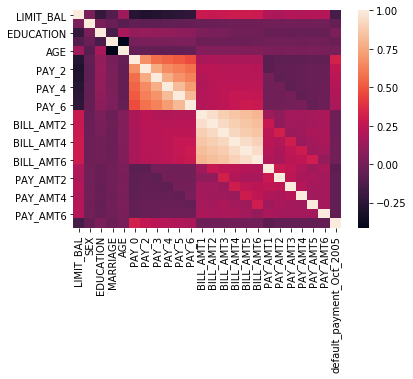

In [10]:
# Correlation Heat map
sns.heatmap(corrMat)

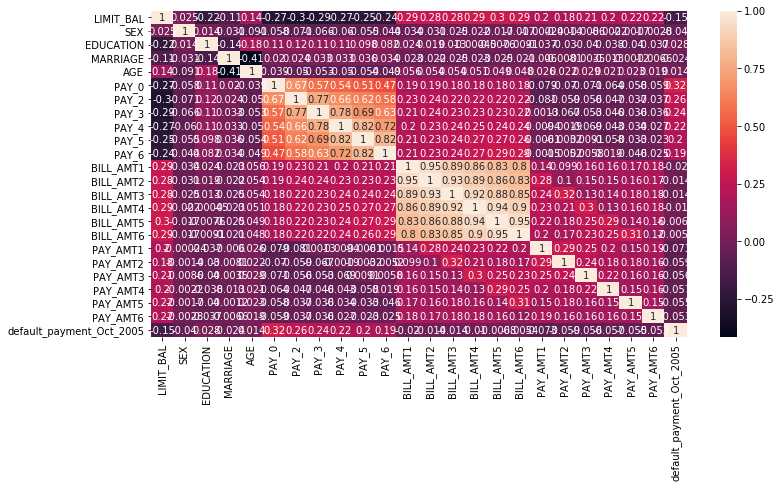

In [11]:
# Correlation heat map
plt.figure(figsize = (12,6))
sns.heatmap(corrMat, annot = True,)

In [12]:
# using covariance to study how changes in one varialbe are associated with changes in a 
# second variable.
# Calculating covariance
covMat = creditD.cov()
print (covMat)

                             LIMIT_BAL          SEX     EDUCATION  \
LIMIT_BAL                 1.683446e+10  1571.050630 -22474.028945   
SEX                       1.571051e+03     0.239247      0.005502   
EDUCATION                -2.247403e+04     0.005502      0.624651   
MARRIAGE                 -7.323670e+03    -0.008014     -0.059184   
AGE                       1.730767e+05    -0.409726      1.275380   
PAY_0                    -3.954593e+04    -0.031685      0.093584   
PAY_2                    -4.603765e+04    -0.041442      0.115025   
PAY_3                    -4.443225e+04    -0.038694      0.107861   
PAY_4                    -4.057181e+04    -0.034411      0.100528   
PAY_5                    -3.667056e+04    -0.030521      0.087340   
PAY_6                    -3.509308e+04    -0.024754      0.074816   
BILL_AMT1                 2.727020e+09 -1211.694332   1372.377644   
BILL_AMT2                 2.570130e+09 -1085.595467   1054.657595   
BILL_AMT3                 2.548533

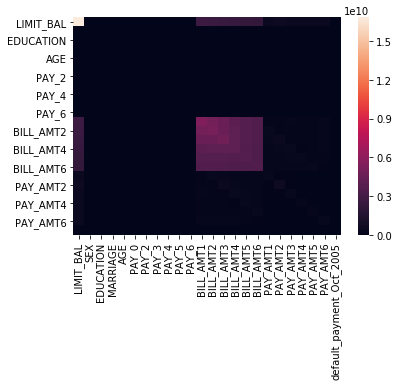

In [13]:
# Covariance heat map

sns.heatmap(covMat)

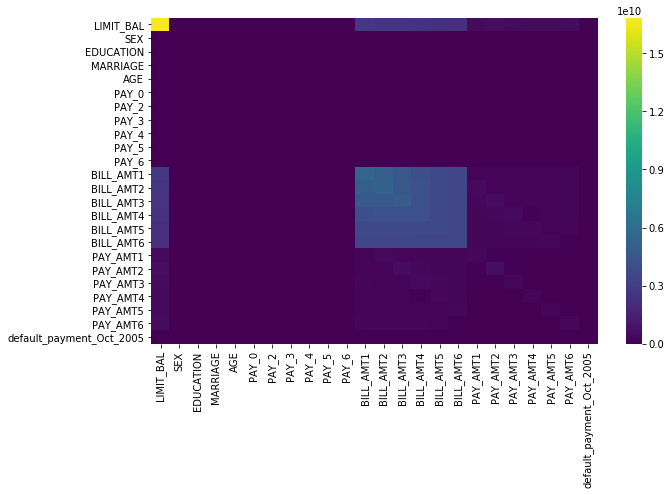

In [14]:
# covariance heat map2
plt.figure(figsize = (10,6))
sns.heatmap(covMat, annot = False, cmap = 'viridis')

### Exploratory Data Analysis

In [15]:
# Determine the number of customers in each educatio level
creditD.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

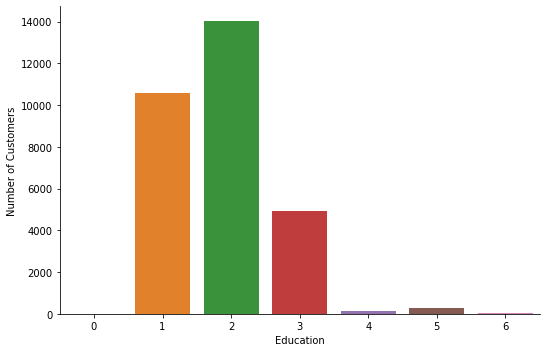

In [16]:
# Use seaborn to plot the customer count in each education class ( 1= graduate school, 2= college, 
# 3= highschool, 0,4-6 = other)
fg1=sns.catplot('EDUCATION', data=creditD, kind='count', aspect=1.5)
fg1.set_xlabels('Education')
fg1.set_ylabels('Number of Customers')

#### The majority of Credit One's customers are University and College Education Levels

In [17]:
# Determine the number of customers by gender, 1= Male, 2 = Female.
creditD.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

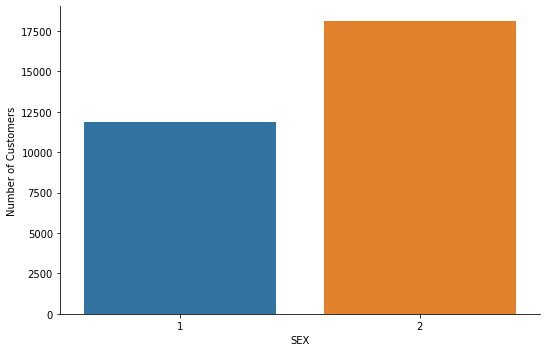

In [18]:
# Use seaborn to plot the number of customers by gender, 1= Male, 2= Female
fg2=sns.catplot('SEX', data=creditD,kind='count',aspect=1.5)
fg2.set_xlabels('SEX')
fg2.set_ylabels('Number of Customers')

#### There are approximatly 50,000 more female than male customers 

In [19]:
#Determine the number of men and women in each education level
creditD.groupby(['SEX','EDUCATION'])['EDUCATION'].count()

SEX  EDUCATION
1    0               8
     1            4354
     2            5374
     3            1990
     4              42
     5              95
     6              25
2    0               6
     1            6231
     2            8656
     3            2927
     4              81
     5             185
     6              26
Name: EDUCATION, dtype: int64

fg3


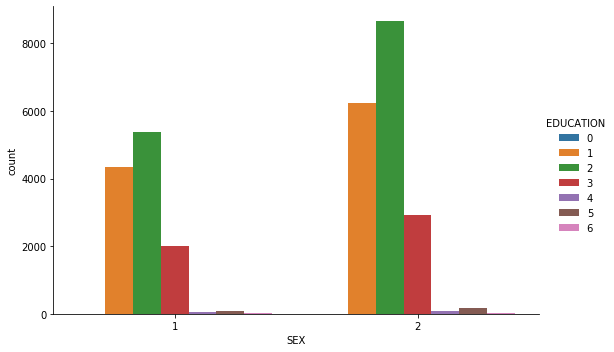

In [20]:
#use seaborn to group by and plot sex and education
fg3=sns.catplot('SEX', data=creditD,hue='EDUCATION', kind='count', aspect=1.5)
fg3.set_xlabels('SEX')
print('fg3')


fg4


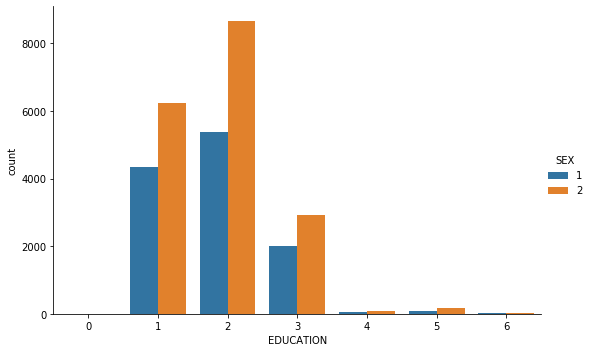

In [21]:
#use seaborn to group by and plot sex and education
fg4=sns.catplot('EDUCATION', data=creditD,hue='SEX', kind='count', aspect=1.5)
fg4.set_xlabels('EDUCATION')
print('fg4')

#### Fig3 and Fig4 both represent plots of customers gener and education level grouped by gender. 1= male, 2= female.  As observed in a previous chart there are more females than males in the customer data.

In [22]:
#determine the number of cutomers who defaulted in Oct 2005, by sex and education.
creditD.pivot_table('default_payment_Oct_2005','EDUCATION','SEX', aggfunc=np.sum, margins=True)


SEX,1,2,All
EDUCATION,,,
0,0,0,0
1,906,1130,2036
2,1408,1922,3330
3,545,692,1237
4,4,3,7
5,6,12,18
6,4,4,8
All,2873,3763,6636


In [23]:
#Determine the number of customers by education level and Marriage status level
creditD.groupby(['EDUCATION','MARRIAGE'])['MARRIAGE'].count()

EDUCATION  MARRIAGE
0          1              4
           2             10
1          0              4
           1           3722
           2           6809
           3             50
2          0              6
           1           6842
           2           7020
           3            162
3          0             44
           1           2861
           2           1909
           3            103
4          1             52
           2             68
           3              3
5          1            150
           2            127
           3              3
6          1             28
           2             21
           3              2
Name: MARRIAGE, dtype: int64

fg5


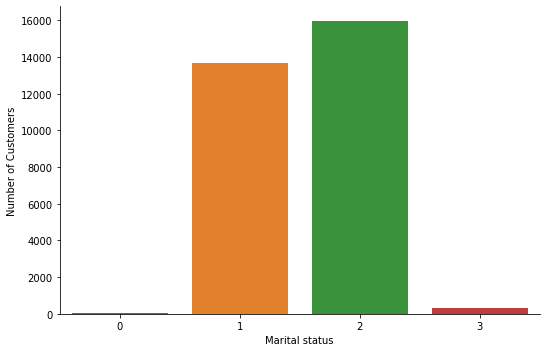

In [24]:
# Use seaborn to plot the customer count in each Marriage class ( 1= married, 2= single, 
# 3= divorce, 0 = other)
fg5=sns.catplot('MARRIAGE', data=creditD, kind='count', aspect=1.5)
fg5.set_xlabels('Marital status')
fg5.set_ylabels('Number of Customers')
print('fg5')

In [25]:
# Determine the number of customers by Marital status, 1= Married, 2 = single, 3= divorced, 0 = other.
creditD.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

fg6


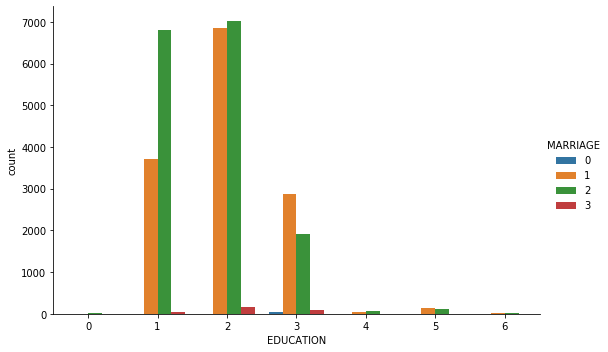

In [26]:
#use seaborn to group by and plot Education and Marrital status
fg6=sns.catplot('EDUCATION', data=creditD,hue='MARRIAGE', kind='count', aspect=1.5)
fg5.set_xlabels('EDUCATION')
print('fg6')

In [27]:
#determine the number of cutomers who defaulted in Oct 2005, by Marriage and education.
creditD.pivot_table('default_payment_Oct_2005','EDUCATION','MARRIAGE', aggfunc=np.sum, margins=True)

MARRIAGE,0,1,2,3,All
EDUCATION,,,,,
0,NaN,0.0,0.0,NaN,0
1,0.0,769.0,1254.0,13.0,2036
2,1.0,1666.0,1619.0,44.0,3330
3,4.0,754.0,452.0,27.0,1237
4,NaN,3.0,4.0,0.0,7
5,NaN,9.0,9.0,0.0,18
6,NaN,5.0,3.0,0.0,8
All,5.0,3206.0,3341.0,84.0,6636


In [28]:
# define those in default and not in default in October 2005
default = creditD[creditD['default_payment_Oct_2005']==1]
not_default= creditD[creditD['default_payment_Oct_2005']==0]

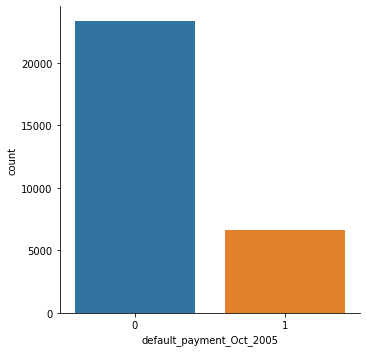

In [29]:
#catplot those who are in defoult vs those not in defoult Oct. 2005
sns.catplot('default_payment_Oct_2005', data= creditD, kind='count')

In [30]:
#total number of customer who default and not defaualt in October 2005
len(default)

6636

In [31]:
len(not_default)

23364

In [32]:
# Customers in default and not in default groped by education, marrital status and sex
table = pd.crosstab(index=[creditD.default_payment_Oct_2005, creditD.EDUCATION,creditD.MARRIAGE], columns=[creditD.SEX])

In [33]:
table.unstack()

SEX                                    1                           2          \
MARRIAGE                               0       1       2     3     0       1   
default_payment_Oct_2005 EDUCATION                                             
0                        0           NaN     2.0     6.0   NaN   NaN     2.0   
                         1           1.0  1300.0  2127.0  20.0   3.0  1653.0   
                         2           1.0  1727.0  2194.0  44.0   4.0  3449.0   
                         3          10.0   745.0   665.0  25.0  30.0  1362.0   
                         4           NaN    16.0    21.0   1.0   NaN    33.0   
                         5           NaN    44.0    44.0   1.0   NaN    97.0   
                         6           NaN    10.0    11.0   0.0   NaN    13.0   
1                        1           NaN   390.0   506.0  10.0   NaN   379.0   
                         2           0.0   643.0   746.0  19.0   1.0  1023.0   
                         3           2.0   303.0   229.0  11.0   2.0   451.0   
                         4           NaN     2.0     2.0   NaN   NaN     1.0   
                         5           NaN     4.0     2.0   NaN   NaN     5.0   
                         6           NaN     4.0     0.0   NaN   NaN     1.0   

SEX                                               
MARRIAGE                                 2     3  
default_payment_Oct_2005 EDUCATION                
0                        0             4.0   NaN  
                         1          3428.0  17.0  
                         2          3207.0  74.0  
                         3           792.0  51.0  
                         4            43.0   2.0  
                         5            74.0   2.0  
                         6             7.0   2.0  
1                        1           748.0   3.0  
                         2           873.0  25.0  
                         3           223.0  16.0  
                         4             2.0   NaN  
                         5             7.0   NaN  
                         6             3.0   NaN

In [34]:
table.columns, table.index

(Int64Index([1, 2], dtype='int64', name='SEX'),
 MultiIndex(levels=[[0, 1], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3]],
            codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6], [1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 1, 2, 1, 2, 1, 2]],
            names=['default_payment_Oct_2005', 'EDUCATION', 'MARRIAGE']))

In [35]:
creditD['SEX']=creditD.SEX.astype(int)

In [36]:
creditD.dtypes

LIMIT_BAL                   int64
SEX                         int32
EDUCATION                   int64
MARRIAGE                    int64
AGE                         int64
PAY_0                       int64
PAY_2                       int64
PAY_3                       int64
PAY_4                       int64
PAY_5                       int64
PAY_6                       int64
BILL_AMT1                   int64
BILL_AMT2                   int64
BILL_AMT3                   int64
BILL_AMT4                   int64
BILL_AMT5                   int64
BILL_AMT6                   int64
PAY_AMT1                    int64
PAY_AMT2                    int64
PAY_AMT3                    int64
PAY_AMT4                    int64
PAY_AMT5                    int64
PAY_AMT6                    int64
default_payment_Oct_2005    int64
dtype: object

### Look at customer age next

In [37]:
print('The average and median age of customers are %0.f and %0.f years old, respectively'%(creditD.AGE.mean(),creditD.AGE.median()))

The average and median age of customers are 35 and 34 years old, respectively


In [38]:
creditD.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [39]:
#Drop missing values for the records in which age of customer is missing
age=creditD['AGE'].dropna()

Text(0.5, 1.0, "Distribution of Credit ONE's Customer Ages")

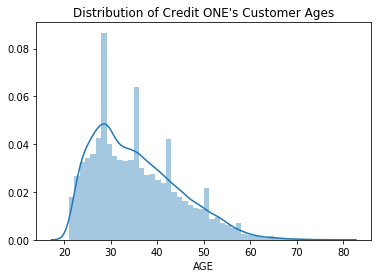

In [40]:
# plot the age distribution with an overlay of density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Credit ONE's Customer Ages")

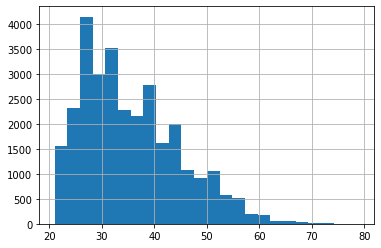

In [41]:
#plot the distribution of age using histogram
creditD['AGE'].hist(bins=24)

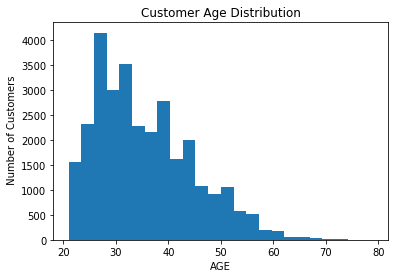

In [42]:
# plot the distribution of age using matplotlib.pyplot
plt.hist(creditD['AGE'],bins=24)
plt.title("Customer Age Distribution")
plt.xlabel("AGE")
plt.ylabel(" Number of Customers")
plt.show()

In [43]:
#create a function to define those who are young (less than 30)
def male_female_young(customer):
    AGE, SEX = customer
    if AGE<30:return'young'
    if SEX<2:return'male'
    if SEX>1:return'female'

In [44]:
# add a column to creditD describing 'person'
creditD['person']=creditD[['AGE','SEX']].apply(male_female_young, axis=1)

In [45]:
# confirm the addtion of the person attribute by looking at the first 10 rows
creditD[:10]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005,person
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,young
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,young
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,female
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,female
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,male
5,50000,1,1,2,37,0,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,male
6,500000,1,1,2,29,0,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,young
7,100000,2,2,2,23,0,-1,-1,0,0,...,-159,567,380,601,0,581,1687,1542,0,young
8,140000,2,3,1,28,0,0,2,0,0,...,11793,3719,3329,0,432,1000,1000,1000,0,young
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,13007,13912,0,0,0,13007,1122,0,0,male


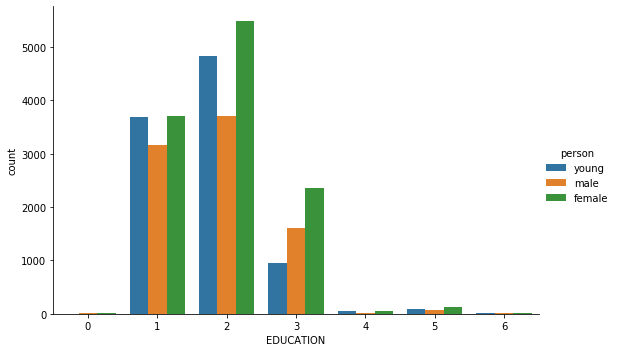

In [46]:
#create catplot for customers splitt into sex,young,and education
sns.catplot('EDUCATION',data = creditD, kind='count', hue='person', order=[0,1,2,3,4,5,6], hue_order = ['young', 'male','female'],aspect=1.5)

In [47]:
#Determine the number of men, women,and young customers
creditD['person'].value_counts()

female    11775
young      9618
male       8607
Name: person, dtype: int64

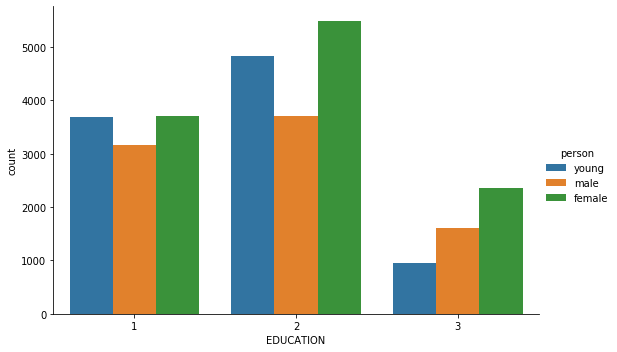

In [48]:
# create catplot for customers split into sex,young and graduate school, college, and high school
sns.catplot('EDUCATION',data = creditD, kind='count', hue='person', order=[1,2,3], hue_order = ['young', 'male','female'],aspect=1.5)

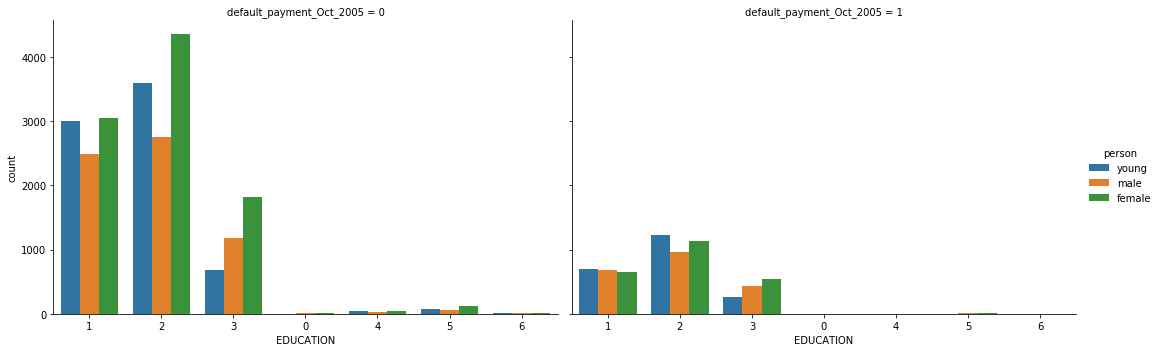

In [49]:
# split the customers into default or not default in Oct 2005
sns.catplot('EDUCATION', data=creditD, kind='count', hue = 'person', col='default_payment_Oct_2005', order=[1,2,3,0,4,5,6],
              hue_order=['young','male', 'female'], aspect=1.5, height=5)

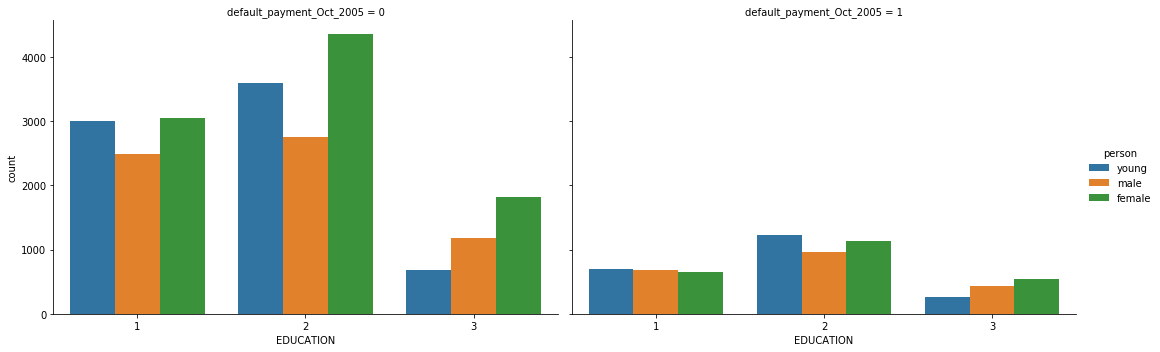

In [51]:
# split the customers into default or not default in Oct 2005
sns.catplot('EDUCATION', data=creditD, kind='count', hue = 'person', col='default_payment_Oct_2005', order=[1,2,3],
              hue_order=['young','male', 'female'], aspect=1.5, height=5)

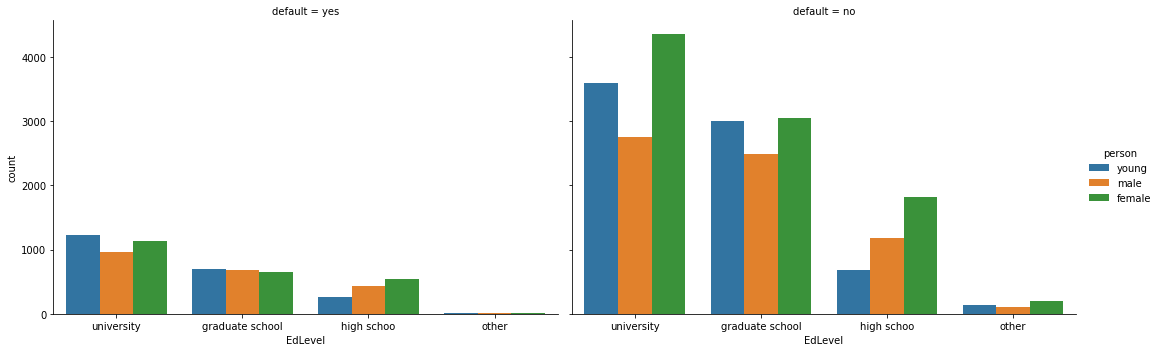

In [6]:
# split the customers into default or not default in Oct 2005
sns.catplot('EdLevel', data=creditD, kind='count', hue = 'person', col='default',
              hue_order=['young','male', 'female'], aspect=1.5, height=5)
plt.show()

#### There are more people in the university education catergory that default on their Oct. 2005 payment than in grad school  and highschool catergories. From the college education category there are more young adults that default on their Oct 2005 payment than males and females.

###  KDE Plot (kernle density estimate plot)

#### KDE plot is used to visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable.

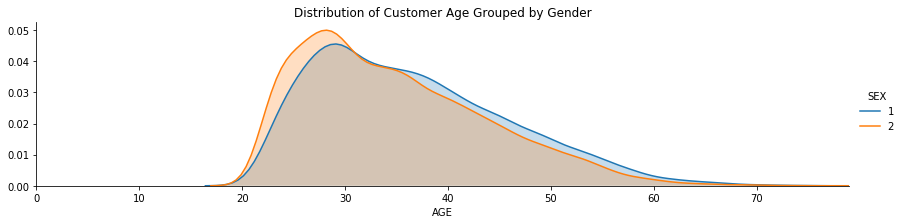

In [52]:
# KDE plot grouped by gender
fig = sns.FacetGrid(creditD, hue='SEX', aspect=4)
fig.map(sns.kdeplot,'AGE', shade=True)
oldest = creditD['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Customer Age Grouped by Gender')
fig.add_legend()

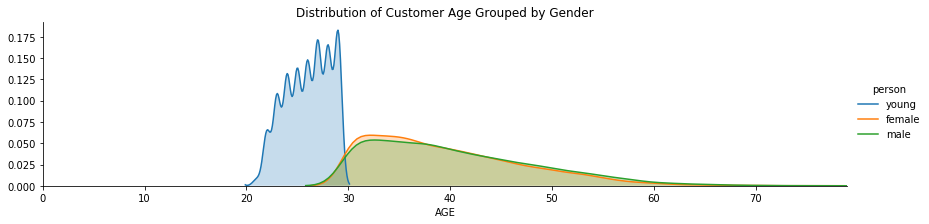

In [53]:
# include young adults
fig = sns.FacetGrid(creditD, hue='person', aspect=4)
fig.map(sns.kdeplot,'AGE', shade=True)
oldest = creditD['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Customer Age Grouped by Gender')
fig.add_legend()

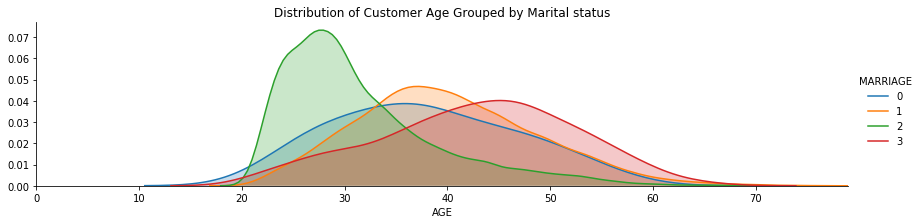

In [54]:
#Kde plot by Age and grouped by marital status
fig = sns.FacetGrid(creditD, hue='MARRIAGE', aspect=4)
fig.map(sns.kdeplot,'AGE', shade=True)
oldest = creditD['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Customer Age Grouped by Marital status')
fig.add_legend()

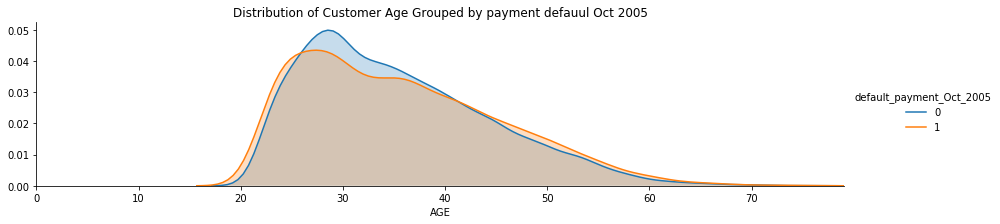

In [55]:
#kde plot by Age and grouped by default payment oct 2005
fig = sns.FacetGrid(creditD, hue='default_payment_Oct_2005', aspect=4)
fig.map(sns.kdeplot,'AGE', shade=True)
oldest = creditD['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Customer Age Grouped by payment defauul Oct 2005')
fig.add_legend()

## Other factors that may be affecting default: Gender, Education, Marrital status

In [56]:
# add a column to data frame describing default as yes or no, 
creditD['default']=creditD.default_payment_Oct_2005.map({0:'no', 1:'yes'})

In [57]:
#add a column to data frame describing SEX. 1=Male, 2= female
creditD['GENDER']=creditD.SEX.map({1:'Male', 2:'female'})

In [58]:
creditD.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005,person,default,GENDER
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,young,yes,female
1,120000,2,2,2,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,young,yes,female
2,90000,2,2,2,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,female,no,female
3,50000,2,2,1,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,female,no,female
4,50000,1,2,1,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,0,male,no,Male


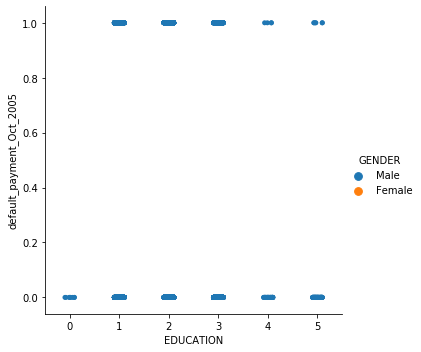

In [59]:
# plot Education Factor
sns.catplot('EDUCATION','default_payment_Oct_2005', hue='GENDER', data=creditD, order=range(0,6),
           hue_order = ['Male', 'Female'])

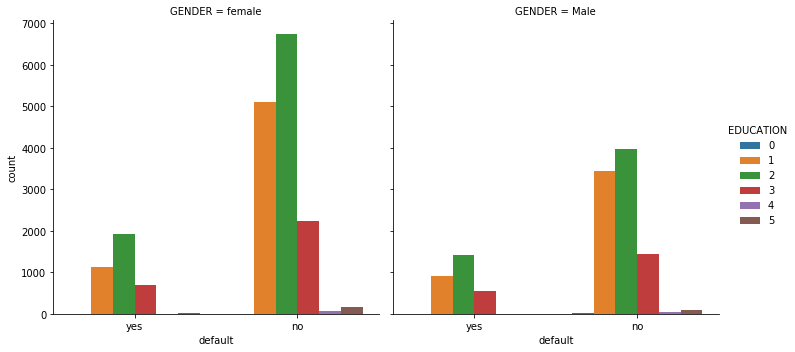

In [60]:
sns.catplot('default', data=creditD, hue='EDUCATION', kind='count', hue_order=range(0,6), col='GENDER')

### Look at Marrital status Factor

In [61]:
# add new column to creditD describing Marital status
creditD['Mstatus']=creditD.MARRIAGE.map({0:'other', 1:'married',2:'single',3:'divorce'})

In [62]:
creditD.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005,person,default,GENDER,Mstatus
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,1,young,yes,female,married
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,1,young,yes,female,single
2,90000,2,2,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,female,no,female,single
3,50000,2,2,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,female,no,female,married
4,50000,1,2,1,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,0,male,no,Male,married


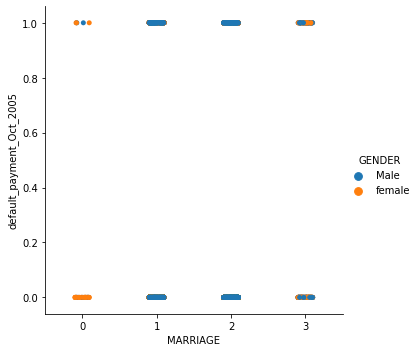

In [63]:
# plot defoult customers based on Marrital status and Gender
sns.catplot('MARRIAGE','default_payment_Oct_2005',hue='GENDER', data=creditD, order=range(0,4),
           hue_order = ['Male', 'female'])

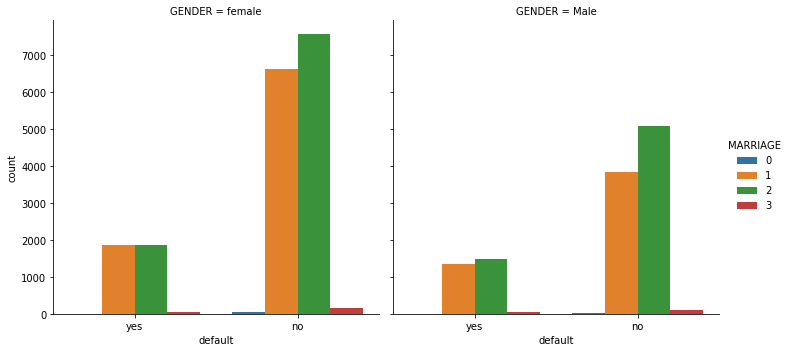

In [64]:
# plot the count of default customers based on Marrital status and Gender
sns.catplot('default', data=creditD, hue='MARRIAGE', kind='count', hue_order=range(0,4), col='GENDER')

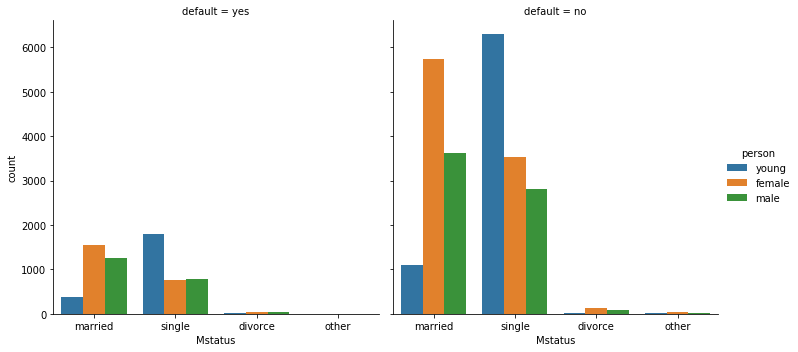

In [9]:
# plot the count of default customers based on Marrital status and Gender
sns.catplot('Mstatus', data=creditD, hue='person', kind='count', col='default')

## The Age factor on default payments

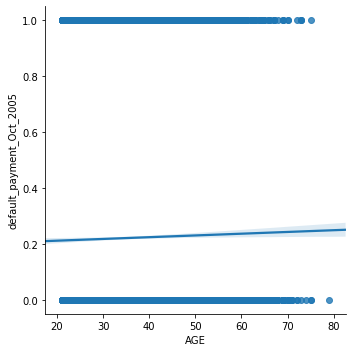

In [65]:
#plot a linear plot of customers in default in oct_2005
sns.lmplot('AGE','default_payment_Oct_2005', data=creditD)

### There seems to be a small but neglegible relationship between age and default status in the customers. It appears to be that the older the customer the more default that exists.

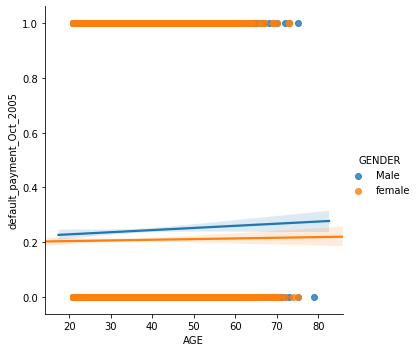

In [66]:
# linear plot of customers in default payment in Oct2005 by Age & gender
sns.lmplot('AGE', 'default_payment_Oct_2005', data=creditD, hue='GENDER', hue_order=['Male', 'female'])

### The plot shows that males of all ages have a slightly higher propensity to default a payment and that older males are more like ly to default than younger males.

In [67]:
# add new column to creditD describing Education level
creditD['EdLevel']=creditD.EDUCATION.map({0:'other', 1:'graduate school',2:'university',3:'high schoo', 4:'other',5:'other',6:'other'})

In [68]:
creditD.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005,person,default,GENDER,Mstatus,EdLevel
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,1,young,yes,female,married,university
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,0,2000,1,young,yes,female,single,university
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,female,no,female,single,university
3,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,female,no,female,married,university
4,50000,1,2,1,57,-1,0,-1,0,0,...,10000,9000,689,679,0,male,no,Male,married,university


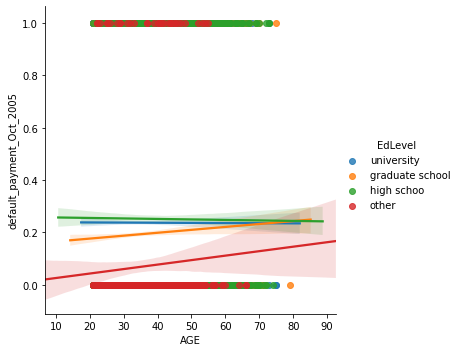

In [69]:
#  linear plot of customers in default Oct 2005 payment by  Age and grouped by education
sns.lmplot('AGE', 'default_payment_Oct_2005', hue='EdLevel', data=creditD)

### in college and high school educated customers the chance of default is higher than customers who attended graduate school. however, this changes as age reach approximatly 70. past 70 all three have the similar probability of defaulting

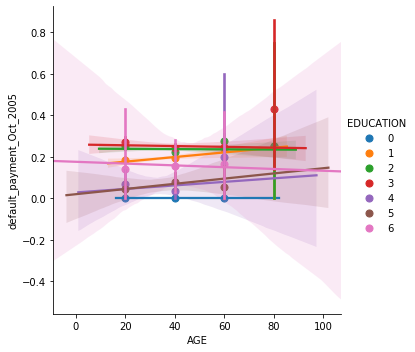

In [70]:
# Look at linear plot of customers who default in Oct 2005 by generation and education levels 
# first Create a generation bin
generations =[20,40,60,80]
sns.lmplot('AGE','default_payment_Oct_2005', hue='EDUCATION',data=creditD,x_bins=generations,
           hue_order=[0,1,2,3,4,5,6])

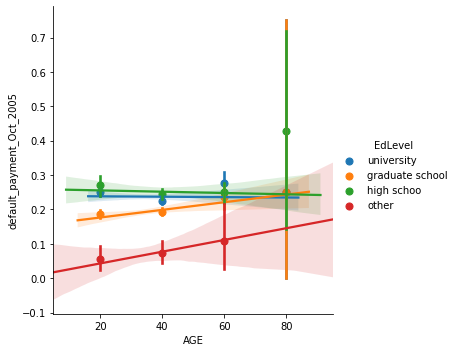

In [71]:
# to simplify the plot use the EdLevel feature created above to Look at linear plot of customers who 
# default in Oct 2005 by generation and education levels 
# first Create a generation bin
generations =[20,40,60,80]
sns.lmplot('AGE','default_payment_Oct_2005', hue='EdLevel',data=creditD,x_bins=generations)
           

### The plot suggests that the older generation of high school level customers have a higher default propensity.

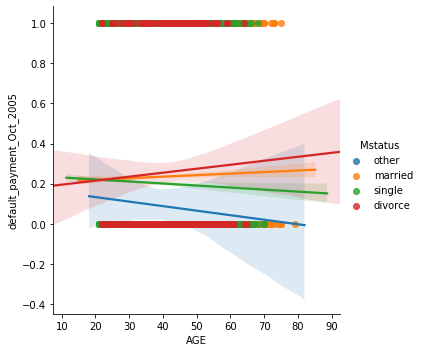

In [72]:
# look at customers who default Oct 2005 payment by Age grouped and Marital status
sns.lmplot('AGE','default_payment_Oct_2005', hue='Mstatus',data=creditD,
           hue_order=['other','married','single','divorce'])

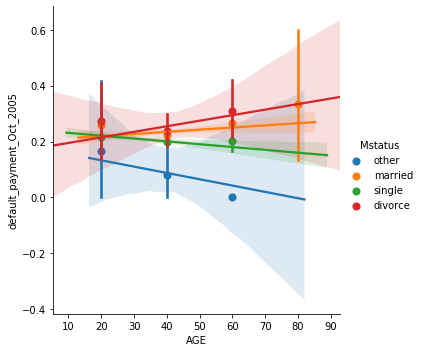

In [73]:
#  look at customers who default Oct 2005 payment by Age grouped and Marital status and apply 
# generation bins created above.
sns.lmplot('AGE','default_payment_Oct_2005', hue='Mstatus',data=creditD,x_bins=generations,
           hue_order=['other','married','single','divorce'])

### There appears to be an increase in default propensity with age and divorce. Additionally a drecrease in in default with age and singles and other marital status.

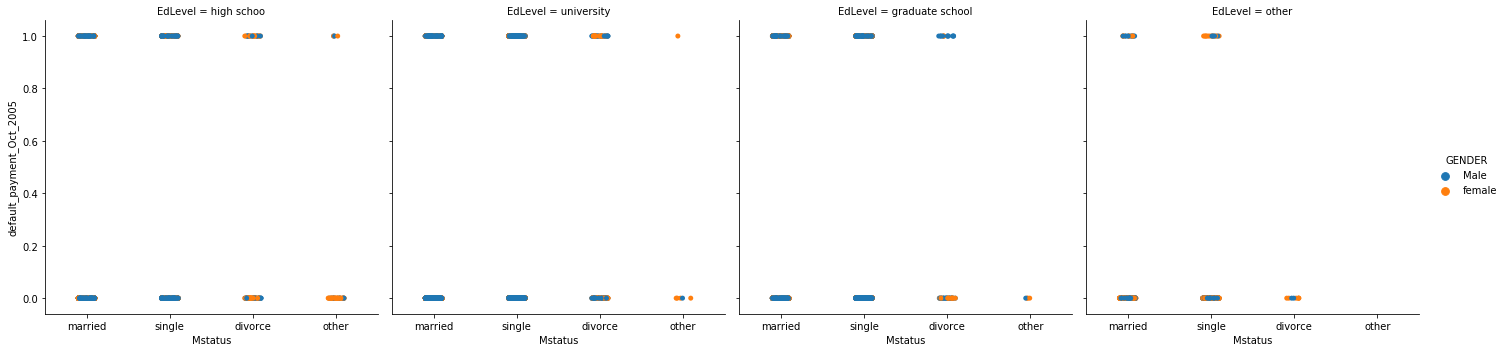

In [74]:
# look at customers who default in oct 2005 by marital status and gender and grouped by Education levels

sns.catplot('Mstatus','default_payment_Oct_2005', data=creditD, hue='GENDER', 
            hue_order=['Male', 'female'], col='EdLevel',col_order=['high schoo', 'university', 'graduate school','other'])

In [75]:
# create csv file of data frame 
creditD.to_csv("creditD.csv", sep=',')

## Classification to predict Default Payment Next Month

In [76]:
# confirm the beggining of the data set
creditD.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005,person,default,GENDER,Mstatus,EdLevel
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,1,young,yes,female,married,university
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,0,2000,1,young,yes,female,single,university
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,female,no,female,single,university
3,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,female,no,female,married,university
4,50000,1,2,1,57,-1,0,-1,0,0,...,10000,9000,689,679,0,male,no,Male,married,university


In [77]:
# look at the column names only
creditD.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_Oct_2005', 'person', 'default', 'GENDER', 'Mstatus',
       'EdLevel'],
      dtype='object')

### Feature selection

In [78]:
# create variable for selected features
features = creditD.iloc[:, 2:23]
print('Summary of Feature Sample')
features.head(11)

Summary of Feature Sample


,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,1,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,689,0,0,0,0
1,2,2,26,-1,2,0,0,0,2,2682,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,2,2,34,0,0,0,0,0,0,29239,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,2,1,37,0,0,0,0,0,0,46990,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,2,1,57,-1,0,-1,0,0,0,8617,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
5,1,2,37,0,0,0,0,0,0,64400,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
6,1,2,29,0,0,0,0,0,0,367965,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
7,2,2,23,0,-1,-1,0,0,-1,11876,...,601,221,-159,567,380,601,0,581,1687,1542
8,3,1,28,0,0,2,0,0,0,11285,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
9,3,2,35,-2,-2,-2,-2,-1,-1,0,...,0,0,13007,13912,0,0,0,13007,1122,0


In [79]:
# Select the dependent variable
depVar= creditD['default_payment_Oct_2005']
print('Summary of Dependant Variable')
depVar.head(11)

Summary of Dependant Variable


0     1
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: default_payment_Oct_2005, dtype: int64

In [80]:
# Define the X Training Set with variable = (feature Space: [:] )to select all the rowsX Training)
X_train = (features [:])
X_train_count=X_train.index
print('The number of observation used in the x training set are:',str(X_train_count))
X_train.head()

The number of observation used in the x training set are: RangeIndex(start=0, stop=30000, step=1)


,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,1,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,689,0,0,0,0
1,2,2,26,-1,2,0,0,0,2,2682,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,2,2,34,0,0,0,0,0,0,29239,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,2,1,37,0,0,0,0,0,0,46990,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,2,1,57,-1,0,-1,0,0,0,8617,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [81]:
X_train.tail()

,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
29995,3,1,39,0,0,0,0,0,0,188948,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,3,2,43,-1,-1,-1,-1,0,0,1683,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,2,2,37,4,3,2,-1,0,0,3565,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,3,1,41,1,-1,0,0,0,-1,-1645,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804
29999,2,1,46,0,0,0,0,0,0,47929,...,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000


In [82]:
# Define the Y training set to include all rows and mathch the X training set
Y_train = (depVar[:])
Y_train_count= len(Y_train.index)
print('The number of observations used in the Y training set are:', str(Y_train_count))
Y_train.head()

The number of observations used in the Y training set are: 30000


0    1
1    1
2    0
3    0
4    0
Name: default_payment_Oct_2005, dtype: int64

In [83]:
Y_train.tail()

29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_Oct_2005, dtype: int64

### Since this is a classification problem the tools needed must be imported. These include: the classfication algorithms, packages to determine the model metrics, the rescaling fuction, and the cross validation function

In [84]:
# For classification problem ensure classification algorithms are imported
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# used to determine classification model metrics
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve

# for rescaling of features use a scaler
from sklearn.preprocessing import RobustScaler

#cross validation
from sklearn.model_selection import train_test_split

In [85]:
# To Continue working toward our predictive model cross validation can now be applyed.
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.3)

In [86]:
# use shape function to double check that the split was made as needed
print (X_train.shape)
print (X_test.shape)

(21000, 21)
(9000, 21)


In [87]:
print (Y_train.shape)
print (Y_test.shape)

(21000,)
(9000,)


In [88]:
# Establish the variable names that will represent each model
modelLR = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 700, n_jobs = 1, random_state = 15)
modelRF = RandomForestClassifier(n_estimators = 100)
modelSVM = SVC(gamma = 'scale')
modelADA = AdaBoostClassifier()
modelGB = GradientBoostingClassifier()

In [89]:
# fuction for creatin confusion matrix for each model
def Cmatrix (CM, labels =  ['pay', 'default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [90]:
 # creating data frame for evaluation of metrics for all models
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall'],
                      columns = ['LogisticReg', 'Random Forest', 'Adaboost', 'Gradient Boosting'])

In [91]:
# creating data frame for evaluation of metrics for all models with RFE
metrics2 = pd.DataFrame(index=['accuracy', 'precision', 'recall'],
                      columns = ['RFECV_LogisticReg', 'RFECV_Random Forest', 'RFECV_Adaboost', 'RFECV_Gradient Boosting'])

### Pass the training data thru the classifier algorithms

In [92]:
from sklearn.model_selection import cross_val_score

#### Logistic Regression

In [93]:
# Logistic Regression Classifier Model Fitting
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
score=np.mean(cross_val_score(modelLR, X_train,Y_train, scoring ='accuracy', cv= crossvalidation))
print('Acuracy: %.3f' % score)

#use the training data to train the estimator
modelLR.fit(X_train,Y_train)

# making predictions and evaluating the model
y_pred_test = modelLR.predict(X_test)
metrics.loc['accuracy', 'LogisticReg']= accuracy_score(y_pred= y_pred_test, y_true=Y_test)
metrics.loc['precision','LogisticReg']= precision_score(y_pred= y_pred_test, y_true=Y_test)
metrics.loc['recall', 'LogisticReg']= recall_score(y_pred= y_pred_test, y_true=Y_test)

# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
Cmatrix(CM)

Acuracy: 0.782


PREDICTION,pay,default,Total
pay,6950,0,6950
default,2049,1,2050
Total,8999,1,9000


#### Use Recursive Feature Elimination with Logistic Regression classifier (to see if model improves)

In [94]:
# import RFE module
from sklearn.feature_selection import RFECV

In [95]:
# Use Recursive Feature elimination with cross validation for feature selection
rfecv_LR = RFECV(estimator = modelLR, step =1, cv = 5, scoring = 'accuracy')
rfecv_LR = rfecv_LR.fit(X_train, Y_train)
print('Optimal number of features:', rfecv_LR.n_features_)
print('Best features:', X_train.columns [rfecv_LR.support_] )

Optimal number of features: 1
Best features: Index(['PAY_0'], dtype='object')


In [96]:
# look at the RFE socores
rfecv_LR.grid_scores_

array([0.82104731, 0.80895205, 0.80995209, 0.81033293, 0.81166638,
       0.81114252, 0.81095203, 0.81123775, 0.81190441, 0.81052317,
       0.80880896, 0.80757162, 0.80761901, 0.80190602, 0.79838202,
       0.79857249, 0.78604765, 0.78533336, 0.78166668, 0.78676071,
       0.78604763])

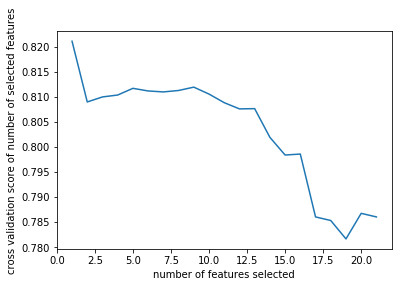

In [97]:
# plot the RFE scores vs the number of selected features
plt.figure()
plt.xlabel("number of features selected")
plt.ylabel("cross validation score of number of selected features")
plt.plot(range(1, len(rfecv_LR.grid_scores_) +1), rfecv_LR.grid_scores_)
plt.show()

In [98]:
# Fit the RFE feature elimination resutl thru the classifier but first we must transform the X_train and X_test to be able to
# to use the RFE results.

X_train_rfecv_LR = rfecv_LR.transform(X_train)
X_test_rfecv_LR = rfecv_LR.transform(X_test)

In [99]:
# Logistic Regression Classifier Model Fitting to the RFE
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
score=np.mean(cross_val_score(modelLR, X_train_rfecv_LR,Y_train, scoring ='accuracy', cv= crossvalidation))
print('Acuracy: %.3f' % score)

#use the training data to train the estimator
model_rfecv_LR  = modelLR.fit(X_train_rfecv_LR,Y_train)

# making predictions and evaluating the model
y_pred_test = model_rfecv_LR.predict(X_test_rfecv_LR)
metrics2.loc['accuracy', 'RFECV_LogisticReg']= accuracy_score(y_pred= y_pred_test, y_true=Y_test)
metrics2.loc['precision','RFECV_LogisticReg']= precision_score(y_pred= y_pred_test, y_true=Y_test)
metrics2.loc['recall', 'RFECV_LogisticReg']= recall_score(y_pred= y_pred_test, y_true=Y_test)

# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
Cmatrix(CM)

Acuracy: 0.821


PREDICTION,pay,default,Total
pay,6693,257,6950
default,1397,653,2050
Total,8090,910,9000


#### Random Forest

In [100]:
# Random Forest Classifier Model Fitting
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
score=np.mean(cross_val_score(modelRF, X_train,Y_train, scoring ='accuracy', cv= crossvalidation))
print('Acuracy: %.3f' % score)

#use the training data to train the estimator
modelRF.fit(X_train,Y_train)

# making predictions and evaluating the model
y_pred_test = modelRF.predict(X_test)
metrics.loc['accuracy', 'Random Forest']= accuracy_score(y_pred= y_pred_test, y_true=Y_test)
metrics.loc['precision','Random Forest']= precision_score(y_pred= y_pred_test, y_true=Y_test)
metrics.loc['recall', 'Random Forest']= recall_score(y_pred= y_pred_test, y_true=Y_test)

# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
Cmatrix(CM)

Acuracy: 0.814


PREDICTION,pay,default,Total
pay,6579,371,6950
default,1317,733,2050
Total,7896,1104,9000


#### Use Recursive Feature Elimination with  Random Forest classifier (to see if model improves)

In [101]:
# Use Recursive Feature elimination with cross validation for feature selection
rfecv_RF = RFECV(estimator = modelRF, step =1, cv = 5, scoring = 'accuracy')
rfecv_RF = rfecv_RF.fit(X_train, Y_train)
print('Optimal number of features:', rfecv_RF.n_features_)
print('Best features:', X_train.columns [rfecv_RF.support_])

Optimal number of features: 15
Best features: Index(['AGE', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


In [102]:
# look at the RFE socores
rfecv_RF.grid_scores_

array([0.68180895, 0.74814278, 0.76409528, 0.80309469, 0.80976162,
       0.81223782, 0.8121424 , 0.81338107, 0.81361896, 0.8143332 ,
       0.81542849, 0.81533326, 0.8154282 , 0.81485679, 0.81595227,
       0.81409506, 0.81561886, 0.81533322, 0.81428552, 0.81404723,
       0.81309512])

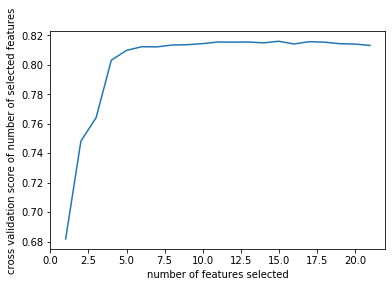

In [103]:
# plot the RFE scores vs the number of selected features
plt.figure()
plt.xlabel("number of features selected")
plt.ylabel("cross validation score of number of selected features")
plt.plot(range(1, len(rfecv_RF.grid_scores_) +1), rfecv_RF.grid_scores_)
plt.show()

In [104]:
# Fit the RFE feature elimination resutl thru the classifier but first we must transform the X_train and X_test to be able to
# to use the RFE results.

X_train_rfecv_RF = rfecv_RF.transform(X_train)
X_test_rfecv_RF = rfecv_RF.transform(X_test)

In [105]:
# Random Forest Classifier Model Fitting to the RFE
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
score=np.mean(cross_val_score(modelRF, X_train_rfecv_RF,Y_train, scoring ='accuracy', cv= crossvalidation))
print('Acuracy: %.3f' % score)

#use the training data to train the estimator
model_rfecv_RF  = modelRF.fit(X_train_rfecv_RF,Y_train)

# making predictions and evaluating the model
y_pred_test = model_rfecv_RF.predict(X_test_rfecv_RF)
metrics2.loc['accuracy', 'RFECV_Random Forest']= accuracy_score(y_pred= y_pred_test, y_true=Y_test)
metrics2.loc['precision','RFECV_Random Forest']= precision_score(y_pred= y_pred_test, y_true=Y_test)
metrics2.loc['recall', 'RFECV_Random Forest']= recall_score(y_pred= y_pred_test, y_true=Y_test)

# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
Cmatrix(CM)

Acuracy: 0.817


PREDICTION,pay,default,Total
pay,6600,350,6950
default,1361,689,2050
Total,7961,1039,9000


#### Adaboost Classifier

In [106]:
# Adaboost Classifier Model Fitting
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
score=np.mean(cross_val_score(modelADA, X_train,Y_train, scoring ='accuracy', cv= crossvalidation))
print('Acuracy: %.3f' % score)

#use the training data to train the estimator
modelADA.fit(X_train,Y_train)

# making predictions and evaluating the model
y_pred_test = modelADA.predict(X_test)
metrics.loc['accuracy', 'Adaboost']= accuracy_score(y_pred= y_pred_test, y_true=Y_test)
metrics.loc['precision','Adaboost']= precision_score(y_pred= y_pred_test, y_true=Y_test)
metrics.loc['recall', 'Adaboost']= recall_score(y_pred= y_pred_test, y_true=Y_test)

# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
Cmatrix(CM)

Acuracy: 0.818


PREDICTION,pay,default,Total
pay,6672,278,6950
default,1430,620,2050
Total,8102,898,9000


In [107]:
# Use Recursive Feature elimination with cross validation for feature selection
rfecv_ADA = RFECV(estimator = modelADA, step =1, cv = 5, scoring = 'accuracy')
rfecv_ADA = rfecv_ADA.fit(X_train, Y_train)
print('Optimal number of features:', rfecv_ADA.n_features_)
print('Best features:', X_train.columns [rfecv_ADA.support_])

Optimal number of features: 9
Best features: Index(['PAY_0', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4'],
      dtype='object')


In [108]:
# look at the RFE socores
rfecv_ADA.grid_scores_

array([0.78133336, 0.78071441, 0.8204283 , 0.8199997 , 0.82004741,
       0.82099976, 0.82104724, 0.81995203, 0.82133298, 0.81976176,
       0.81885697, 0.81866652, 0.8179522 , 0.8167617 , 0.81690444,
       0.817714  , 0.81804734, 0.8177139 , 0.81790433, 0.81819004,
       0.81819004])

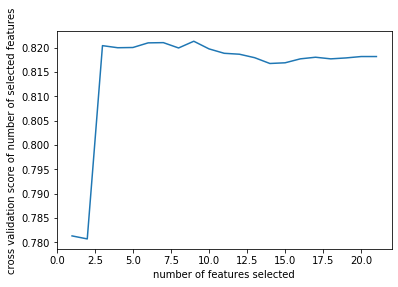

In [109]:
# plot the RFE scores vs the number of selected features
plt.figure()
plt.xlabel("number of features selected")
plt.ylabel("cross validation score of number of selected features")
plt.plot(range(1, len(rfecv_ADA.grid_scores_) +1), rfecv_ADA.grid_scores_)
plt.show()

In [110]:
# Fit the RFE feature elimination resutl thru the classifier but first we must transform the X_train and X_test to be able to
# to use the RFE results.

X_train_rfecv_ADA = rfecv_ADA.transform(X_train)
X_test_rfecv_ADA = rfecv_ADA.transform(X_test)

In [111]:
# Adaboost Classifier Model Fitting to the RFE
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
score=np.mean(cross_val_score(modelADA, X_train_rfecv_ADA,Y_train, scoring ='accuracy', cv= crossvalidation))
print('Acuracy: %.3f' % score)

#use the training data to train the estimator
model_rfecv_ADA  = modelADA.fit(X_train_rfecv_ADA,Y_train)

# making predictions and evaluating the model
y_pred_test = model_rfecv_ADA.predict(X_test_rfecv_ADA)
metrics2.loc['accuracy', 'RFECV_Adaboost']= accuracy_score(y_pred= y_pred_test, y_true=Y_test)
metrics2.loc['precision','RFECV_Adaboost']= precision_score(y_pred= y_pred_test, y_true=Y_test)
metrics2.loc['recall', 'RFECV_Adaboost']= recall_score(y_pred= y_pred_test, y_true=Y_test)

# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
Cmatrix(CM)

Acuracy: 0.820


PREDICTION,pay,default,Total
pay,6685,265,6950
default,1400,650,2050
Total,8085,915,9000


#### Gradient Boosting Classifier

In [112]:
# Gradient Boosting Model Fitting
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
score=np.mean(cross_val_score(modelGB, X_train,Y_train, scoring ='accuracy', cv= crossvalidation))
print('Acuracy: %.3f' % score)

#use the training data to train the estimator
modelGB.fit(X_train,Y_train)

# making predictions and evaluating the model
y_pred_test = modelGB.predict(X_test)
metrics.loc['accuracy', 'Gradient Boosting']= accuracy_score(y_pred= y_pred_test, y_true=Y_test)
metrics.loc['precision','Gradient Boosting']= precision_score(y_pred= y_pred_test, y_true=Y_test)
metrics.loc['recall', 'Gradient Boosting']= recall_score(y_pred= y_pred_test, y_true=Y_test)

# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
Cmatrix(CM)

Acuracy: 0.822


PREDICTION,pay,default,Total
pay,6636,314,6950
default,1322,728,2050
Total,7958,1042,9000


In [113]:
# Use Recursive Feature elimination with cross validation for feature selection
rfecv_GB = RFECV(estimator = modelGB, step =1, cv = 5, scoring = 'accuracy')
rfecv_GB = rfecv_GB.fit(X_train, Y_train)
print('Optimal number of features:', rfecv_GB.n_features_)
print('Best features:', X_train.columns [rfecv_GB.support_])

Optimal number of features: 20
Best features: Index(['EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


In [114]:
# look at the RFE socores
rfecv_GB.grid_scores_

array([0.82085682, 0.82195218, 0.82080915, 0.82080913, 0.82095203,
       0.82190443, 0.82157102, 0.82123784, 0.82176162, 0.820857  ,
       0.82185703, 0.82195224, 0.82142843, 0.82109511, 0.82099986,
       0.8206189 , 0.82123796, 0.82161888, 0.82152362, 0.82214259,
       0.82176161])

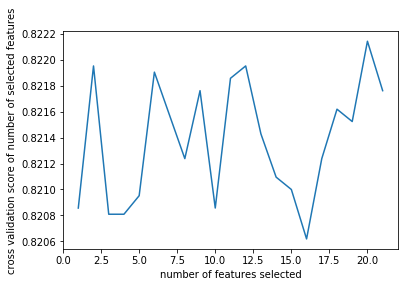

In [115]:
# plot the RFE scores vs the number of selected features
plt.figure()
plt.xlabel("number of features selected")
plt.ylabel("cross validation score of number of selected features")
plt.plot(range(1, len(rfecv_GB.grid_scores_) +1), rfecv_GB.grid_scores_)
plt.show()

In [116]:
# Fit the RFE feature elimination resutl thru the classifier but first we must transform the X_train and X_test to be able to
# to use the RFE results.

X_train_rfecv_GB = rfecv_GB.transform(X_train)
X_test_rfecv_GB = rfecv_GB.transform(X_test)

In [117]:
# Gradient bosting Classifier Model Fitting to the RFE
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
score=np.mean(cross_val_score(modelGB, X_train_rfecv_GB,Y_train, scoring ='accuracy', cv= crossvalidation))
print('Acuracy: %.3f' % score)

#use the training data to train the estimator
model_rfecv_GB  = modelGB.fit(X_train_rfecv_GB,Y_train)

# making predictions and evaluating the model
y_pred_test = model_rfecv_GB.predict(X_test_rfecv_GB)
metrics2.loc['accuracy', 'RFECV_Gradient Boosting']= accuracy_score(y_pred= y_pred_test, y_true=Y_test)
metrics2.loc['precision','RFECV_Gradient Boosting']= precision_score(y_pred= y_pred_test, y_true=Y_test)
metrics2.loc['recall', 'RFECV_Gradient Boosting']= recall_score(y_pred= y_pred_test, y_true=Y_test)

# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
Cmatrix(CM)

Acuracy: 0.822


PREDICTION,pay,default,Total
pay,6636,314,6950
default,1327,723,2050
Total,7963,1037,9000


### Model Evaluation

In [118]:
# look at the recorded metrics for the classification models
100*metrics

,LogisticReg,Random Forest,Adaboost,Gradient Boosting
accuracy,77.2333,81.2444,81.0222,81.8222
precision,100,66.3949,69.0423,69.8656
recall,0.0487805,35.7561,30.2439,35.5122


In [119]:
# Look at the recorded metrics for the classification models with RFE
100*metrics2

,RFECV_LogisticReg,RFECV_Random Forest,RFECV_Adaboost,RFECV_Gradient Boosting
accuracy,81.6222,80.9889,81.5,81.7667
precision,71.7582,66.3138,71.0383,69.7203
recall,31.8537,33.6098,31.7073,35.2683


#### Note: Accuracy describes the proportion of the total number of predictions that are corect. Overall how often the model predicts correctly. Precision describes the proportion of positive prediction that are actually correct. when the model predicts default(1) how ofen in the model correct. Recall describes the proportion of positive observed values correctly predicted as such. The proportion of actual defaulters the model will correctly predict as such.

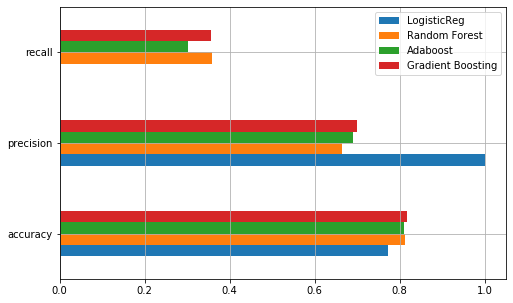

In [120]:
# plot the model metrics for visualization
fig1, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid();

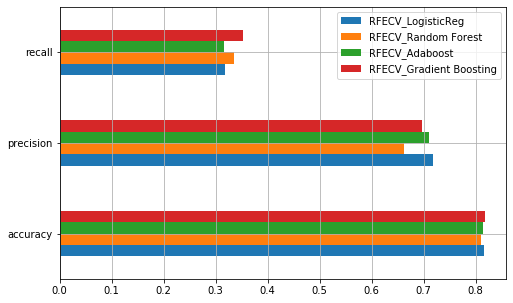

In [121]:
# plot the model metrics2 for models with RFE for  visualization
fig2, ax = plt.subplots(figsize=(8,5))
metrics2.plot(kind='barh', ax=ax)
ax.grid();

#### Based on the metrics I will look at classifiers Adaboost and Gradient boositing with RFECV.

In [125]:
# look at the relationship between precision and recall metrics for RFECV_Adaboost and RFECV_Gradient Boosting
# to determine which is the better model with higher recall score
precision_rfecv_ADA, recall_rfecv_ADA, threshold_rfecv_ADA = precision_recall_curve(y_true=Y_test,
                                                               probas_pred=model_rfecv_ADA.predict_proba(X_test_rfecv_ADA)
                                                              [:,1])
precision_rfecv_GB, recall_rfecv_GB, threshold_rfecv_GB = precision_recall_curve(y_true=Y_test,
                                                               probas_pred=model_rfecv_GB.predict_proba(X_test_rfecv_GB)[:,1])

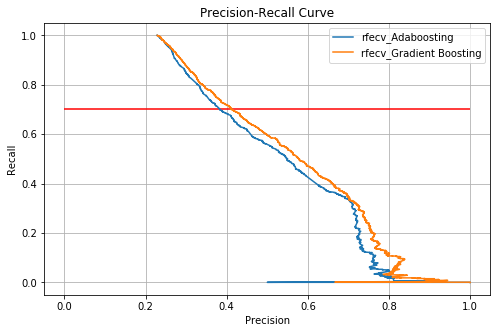

In [126]:
# make a plot using precision and recall metrics for the two models
fig3, ax = plt.subplots(figsize=(8,5))
ax.plot(precision_rfecv_ADA, recall_rfecv_ADA, label='rfecv_Adaboosting')
ax.plot(precision_rfecv_GB, recall_rfecv_GB, label='rfecv_Gradient Boosting')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-Recall Curve')
ax.hlines(y=0.7, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();
            

#### The Precision-Recall Curve shows that for the majority of the precision points the rfecv_Gradient Boosting model has a higher recall. This shows that this is the better model for our predictions.

### Adjusting the Classification Threshold

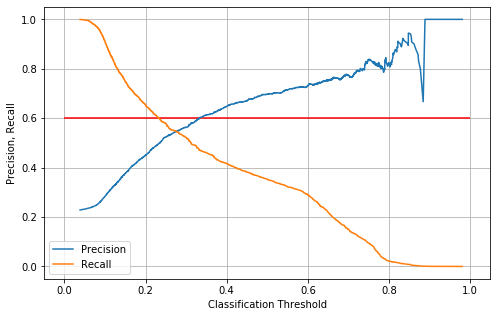

In [127]:
#Looking at the relationship between the  threshold and precision and recall metrics to deterimine 
# the optimal threshold for model_rfecv_GB to have a higher recall score
fig4,ax=plt.subplots(figsize=(8,5))
ax.plot(threshold_rfecv_GB, precision_rfecv_GB[1:], label='Precision')
ax.plot(threshold_rfecv_GB, recall_rfecv_GB[1:], label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.hlines(y=0.6, xmin=0,xmax=1, color='red')
ax.legend()
ax.grid();

###  Modifiy the rfecv_Gradient Boosting Classifier with to classfication thereshold of 0.2

In [130]:
y_pred_proba = model_rfecv_GB.predict_proba(X_test_rfecv_GB)[:,1]
y_pred_test = (y_pred_proba >=0.2).astype('int')

#confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
print("Recall:", 100*recall_score(y_pred=y_pred_test, y_true=Y_test))
print("Precision:", 100*precision_score(y_pred=y_pred_test, y_true=Y_test))
Cmatrix(CM)

Recall: 65.26829268292683
Precision: 44.95967741935484


PREDICTION,pay,default,Total
pay,5312,1638,6950
default,712,1338,2050
Total,6024,2976,9000


#### The rfecv_ Gradient Boosting Cassifier with a modified classfication threshold to 0.2 will be used for predictions. This model yields a precision score of 45 % and a recall score of 65%. This means that 65% of the predicted to defaul actually do default.